Train

In [6]:
!python ../../dump_dataset.py -o 5000 -c 70 -j 5

Set random seed to 5
{'PROCESSOR_NUM': 24, 'CLAUSE_NUM': 700, 'VARIABLE_NUM': 70, 'MIN_VARIABLE_NUM': 1, 'BATCH_SIZE': 1, 'CLAUSE_SIZE': 700, 'MIN_CLAUSE_NUM': 1, 'SR_GENERATOR': True}
100%|███████████████████████████████████████| 5000/5000 [06:40<00:00, 12.48it/s]


Test

In [7]:
!python ../../dump_dataset.py -o 1000 -c 70 -j 6

Set random seed to 6
{'PROCESSOR_NUM': 24, 'CLAUSE_NUM': 700, 'VARIABLE_NUM': 70, 'MIN_VARIABLE_NUM': 1, 'BATCH_SIZE': 1, 'CLAUSE_SIZE': 700, 'MIN_CLAUSE_NUM': 1, 'SR_GENERATOR': True}
100%|███████████████████████████████████████| 1000/1000 [01:20<00:00, 12.39it/s]


In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_30/train_1_sr_30.tfrecord \
    --test_file=sr_30/test_2_sr_30.tfrecord \
    --train_steps=500 \
    --test_steps=80 \
    --model_dir=model_sr_30 \
    --export_dir=export_sr_30 \
    --variable_number=30 \
    --clause_number=300 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_50/train_3_sr_50.tfrecord \
    --test_file=sr_50/test_4_sr_50.tfrecord \
    --train_steps=500 \
    --test_steps=120 \
    --model_dir=model_sr_50 \
    --export_dir=export_sr_50 \
    --variable_number=50 \
    --clause_number=500 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_70/train_5_sr_70.tfrecord \
    --test_file=sr_70/test_6_sr_70.tfrecord \
    --train_steps=500 \
    --test_steps=120 \
    --model_dir=model_sr_70 \
    --export_dir=export_sr_70 \
    --variable_number=70 \
    --clause_number=700 \
    --train_files_gzipped=False \
    --batch_size=16 \
    --export_model \
    --attention=True

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_100/train_7_sr_100.tfrecord \
    --test_file=sr_100/test_8_sr_100.tfrecord \
    --train_steps=500 \
    --test_steps=120 \
    --model_dir=model_sr_100 \
    --export_dir=export_sr_100 \
    --variable_number=100 \
    --clause_number=1000 \
    --train_files_gzipped=False \
    --batch_size=16 \
    --export_model \
    --attention=True

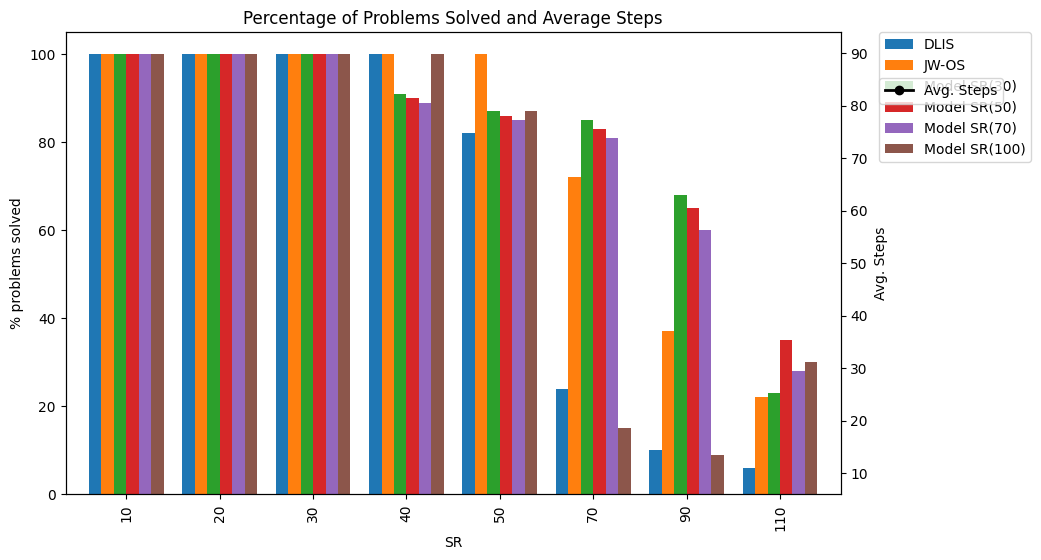

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos ficticios para % de problemas resueltos
data = {
    'SR': [10, 20, 30, 40, 50, 70, 90, 110],
    'DLIS': [100, 100, 100, 100, 82, 24, 10, 6],
    'JW-OS': [100, 100, 100, 100, 100, 72, 37, 22],
    'Model SR(30)': [100, 100, 100, 91, 87, 85, 68, 23],
    'Model SR(50)': [100, 100, 100, 90, 86, 83, 65, 35],
    'Model SR(70)': [100, 100, 100, 89, 85, 81, 60, 28],
    'Model SR(100)': [100, 100, 100, 100, 87, 15, 9, 2]
}

steps = [10, 15, 20, 25, 30, 50, 70, 90]  # Baja al principio y sube al final

# Crear DataFrame
df = pd.DataFrame(data)

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras
df.set_index('SR').plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xlabel('SR')
ax1.set_ylabel('% problems solved')

# Crear un segundo eje y para los pasos
ax2 = ax1.twinx()
ax2.plot(df['SR'], steps, color='black', marker='o', linestyle='-', linewidth=2, label='Avg. Steps')
ax2.set_ylabel('Avg. Steps')

# Añadir leyenda
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.9), borderaxespad=0.)

# Mostrar el gráfico
plt.title('Percentage of Problems Solved and Average Steps')
plt.show()


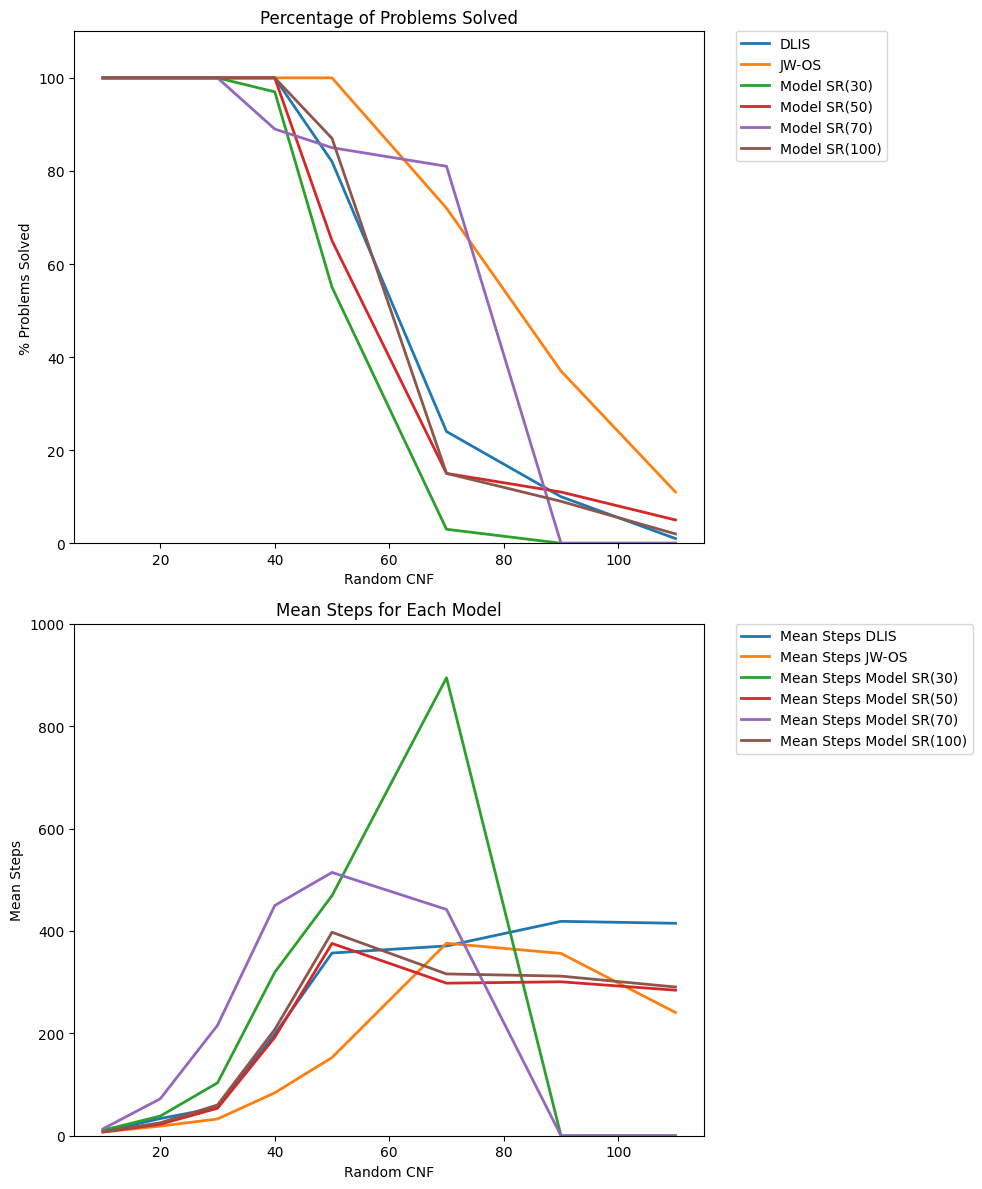

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SR = [10, 20, 30, 40, 50, 70, 90, 110]

# Datos para % de problemas resueltos
data = {
    'DLIS': [100, 100, 100, 100, 82, 24, 10, 1],
    'JW-OS': [100, 100, 100, 100, 100, 72, 37, 11],
    'Model SR(30)': [100, 100, 100, 97, 55, 3, 0, 0],
    'Model SR(50)': [100, 100, 100, 100, 65, 15, 11, 5],
    'Model SR(70)': [100, 100, 100, 89, 85, 81, 0, 0],
    'Model SR(100)': [100, 100, 100, 100, 87, 15, 9, 2]
}

# Crear DataFrame
df = pd.DataFrame(data)

mean = [
    [8.16, 33.53, 54.77, 198.68, 356.94, 370.75, 418.8, 415],  # DLIS
    [7.31, 18.76, 32.71, 83.8, 152.69, 375.93, 356.16, 240.73],  # JW-OS
    [10.64, 38.36, 103.3, 319.31, 469, 894.67, 0, 0],  # Model SR(30)
    [7.24, 22.46, 53.69, 192.22, 375.61, 298.01, 300.70, 284.3],  # Model SR(50)
    [13.37, 72.2, 215.7, 449.72, 514.35, 442, 0, 0],  # Model SR(70)
    [8.07, 25.24, 60.05, 207.54, 397.48, 316.07, 311.78, 290.5]  # Model SR(100)
]


# Agregar columnas de media al DataFrame
for i, column in enumerate(df.columns):
    df[f'Mean Steps {column}'] = mean[i]

# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


# Graficar líneas en ax1 para % Problems Solved
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax1.plot(SR, df[column], linewidth=2, label=column)

# Configuración de ax1
ax1.set_xlabel('SR')
ax1.set_ylabel('% Problems Solved')
ax1.set_ylim(0, 110)
ax1.set_title('Percentage of Problems Solved')
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Graficar líneas en ax2 para Mean Steps
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax2.plot(SR, df[f'Mean Steps {column}'], linewidth=2, label=f'Mean Steps {column}')

# Configuración de ax2
ax2.set_xlabel('SR')
ax2.set_ylabel('Mean Steps')
ax2.set_ylim(0, 1000)
ax2.set_title('Mean Steps for Each Model')
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
